<a href="https://colab.research.google.com/github/SubhamDey2004-coder/deep-learning/blob/main/feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shub99/social-network-ads")

print("Path to dataset files:", path)

100%|██████████| 1.46k/1.46k [00:00<00:00, 1.73MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shub99/social-network-ads/versions/1


In [12]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/shub99/social-network-ads/versions/1/Social_Network_Ads.csv')


In [8]:
# df = df.iloc[:,2:]
# df.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


In [9]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

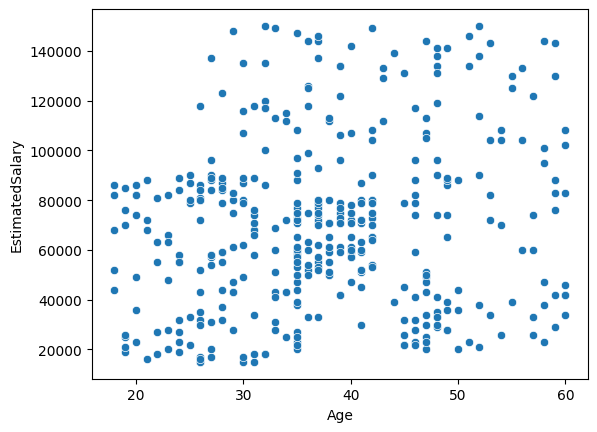

In [13]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [14]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [17]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.6452 - loss: 2075.1772 - val_accuracy: 0.4000 - val_loss: 463.3449
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4408 - loss: 386.0584 - val_accuracy: 0.6000 - val_loss: 300.8508
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5939 - loss: 153.3262 - val_accuracy: 0.6000 - val_loss: 99.3721
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5539 - loss: 81.8460 - val_accuracy: 0.6000 - val_loss: 13.2659
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5239 - loss: 49.1650 - val_accuracy: 0.4000 - val_loss: 103.3355
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4567 - loss: 129.6626 - val_accuracy: 0.4000 - val_loss: 117.2154
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4465 - loss: 72.4325 - val_accuracy: 0.6000 - val_loss: 138.0397
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5643 - loss: 90.1

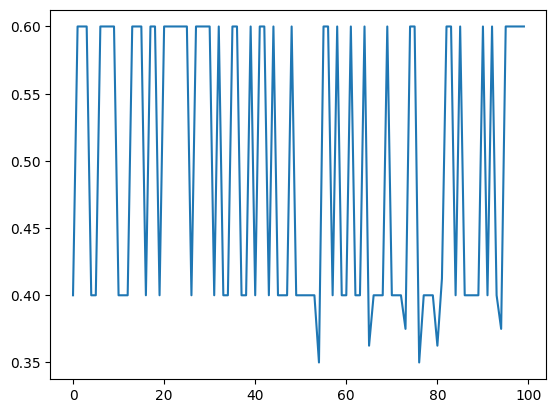

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [22]:
# Applying scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

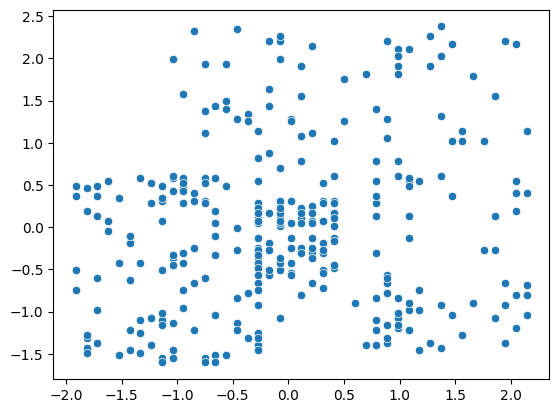

In [26]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [27]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7260 - loss: 0.6611 - val_accuracy: 0.8125 - val_loss: 0.6094
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7920 - loss: 0.6074 - val_accuracy: 0.8625 - val_loss: 0.5568
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8361 - loss: 0.5619 - val_accuracy: 0.8500 - val_loss: 0.5116
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8450 - loss: 0.5274 - val_accuracy: 0.8250 - val_loss: 0.4737
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8501 - loss: 0.4825 - val_accuracy: 0.8125 - val_loss: 0.4425
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8756 - loss: 0.4391 - val_accuracy: 0.8250 - val_loss: 0.4164
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8281 - loss: 0.4459 - val_accuracy: 0.8250 - val_loss: 0.3960
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8706 - loss: 0.3912 - val_accuracy: 0.8375 

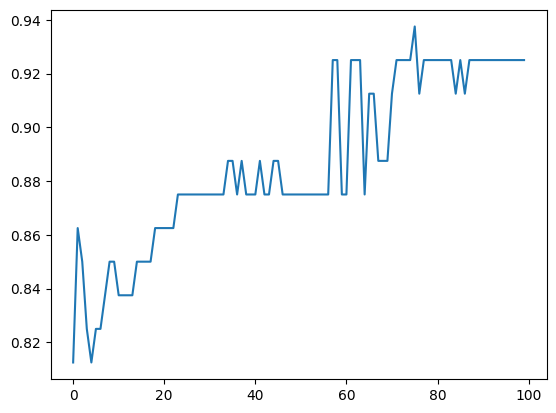

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])